Este colab fue desarrollado por Arnold Charry Armero.

# Heart Valves

U.S. Labs fabrica válvulas cardíacas mecánicas a partir de
las válvulas cardíacas de los cerdos. Diferentes operaciones cardíacas requieren
válvulas de diferentes tamaños. U.S. Labs compra válvulas para cerdos
de tres proveedores diferentes. La combinación de costos y tamaños de
Las válvulas compradas a cada proveedor se dan en la Tabla 3.
Cada mes, U.S. Labs realiza un pedido a cada proveedor.
Se deben instalar al menos 500 válvulas grandes, 300 medianas y 300 pequeñas
comprarse cada mes. Debido a la disponibilidad limitada de
válvulas pig, se pueden comprar como máximo 700 válvulas por mes
de cada proveedor. Formule un LP que pueda usarse para
Minimizar el costo de adquisición de las válvulas necesarias.

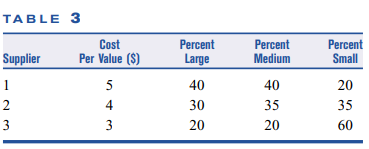

#Conjuntos

$ i = \text{Proveedor empleado indexado por } i$

$ j = \text{Tamaño de válvula indexado por } j$

## Parámetros

$ C_{i} = \textrm{Costo de comprar válvulas al proveedor } i $

$ Q_{ij} = \textrm{Porcentaje comprado de válvulas de corazón } j \textrm{ al proveedor } i$

$ D_{j} = \textrm{Demanda de tipo de válvulas }j $

$ R = \textrm{Máxima cantidad de válvulas permitidas por tamaño }$



## Variables de decisión

$ x_{i} = \textrm{Cantidad de válvulas compradas al proveedor }i$

## Función objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n} C_{i}\: x_{i} $$

## Restricciones

Se debe satisfacer la demanda $j$ de válvulas,

$$ \sum_{i = 1}^{n}x_{i} Q_{ij} \geq  D_{j}, \forall j$$

No se puede sobrepasar 700 válvulas de cada tipo,

$$ x_{i} \leq R_{i}, \forall i$$

In [13]:
#Se instala la libreria
!pip install pulp

In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
proveedores = range(3)
tamaños = range(3)

In [10]:
#Parámetros
C = [5, 4, 3]

Q = [[0.40, 0.4, 0.20], [0.3, 0.35, 0.35], [0.2, 0.2, 0.60]]

R = 700

D = [500, 300, 300]

In [12]:
# Crear la instancia del modelo
model = LpProblem(name="Heart_Valves", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (proveedores), 0, 700, LpContinuous)

# Agregar la función objetivo
model += lpSum([X[i] * C[i] for i in proveedores])

# Agregar las restricciones

#Se debe satisfacer la demanda
for j in tamaños:
  model += lpSum(Q[i][j] * X[i] for i in proveedores) >= D[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costo total = $", value(model.objective))

Status: Optimal
X_0 = 700.0
X_1 = 700.0
X_2 = 50.0
Utilidades totales = $ 6450.0
